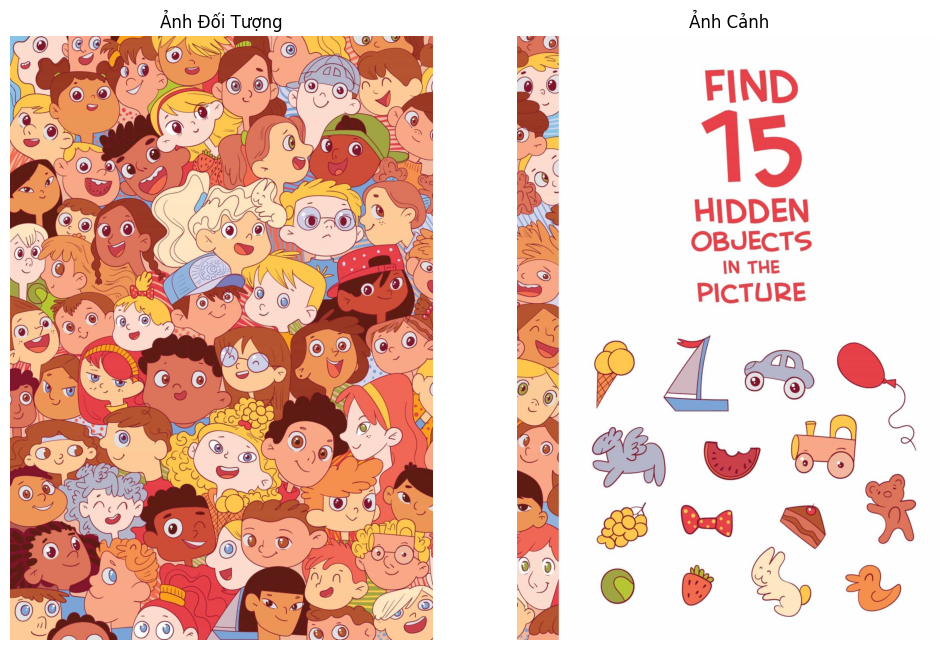

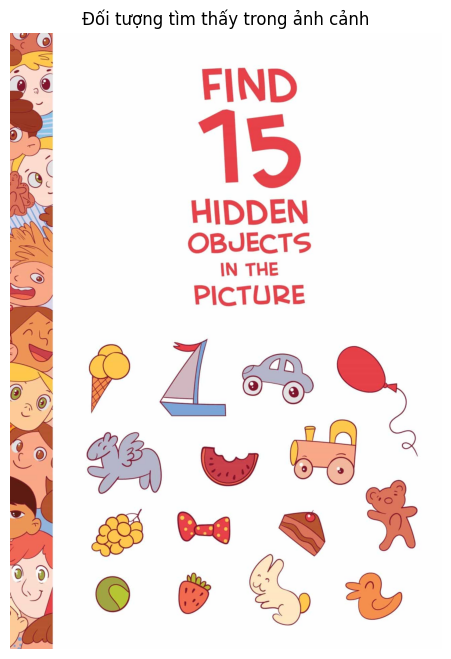

Đã lưu ảnh kết quả: scene_with_object_found.jpg


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)

# -------------------------------
# Bước A: Chia ảnh ban đầu thành 2 phần
# -------------------------------

# 1. Đọc ảnh gốc (ảnh ban đầu chứa cả đối tượng và cảnh)
orig_img = cv2.imread("1.jpg")  # Đảm bảo ảnh "original.jpg" nằm trong cùng thư mục
if orig_img is None:
    raise IOError("Không tìm thấy file ảnh gốc. Vui lòng kiểm tra lại tên hoặc đường dẫn!")

height, width = orig_img.shape[:2]

# Giả sử ảnh ban đầu được chia theo chiều dọc (vertical split):
# - Phần bên trái: ảnh đối tượng (template)
# - Phần bên phải: ảnh cảnh (scene)
object_img = orig_img[:, :width // 2]
scene_img = orig_img[:, width // 2:]

# Hiển thị ảnh đối tượng và ảnh cảnh
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh Đối Tượng")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh Cảnh")
plt.axis("off")
plt.show()


# -------------------------------
# Bước B: Template Matching - Tìm đối tượng trong ảnh cảnh
# -------------------------------

# 2. Chuyển cả 2 ảnh sang grayscale
object_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
scene_gray = cv2.cvtColor(scene_img, cv2.COLOR_BGR2GRAY)

# 3. Sử dụng Template Matching
result = cv2.matchTemplate(scene_gray, object_gray, cv2.TM_CCOEFF_NORMED)
threshold = 0.8  # Ngưỡng so khớp (có thể điều chỉnh)
loc = np.where(result >= threshold)

# 4. Vẽ bounding box tại vị trí tìm được trong ảnh cảnh
scene_with_box = scene_img.copy()
h_temp, w_temp = object_gray.shape

for pt in zip(*loc[::-1]):
    cv2.rectangle(scene_with_box, pt, (pt[0] + w_temp, pt[1] + h_temp), (0, 255, 0), 2)

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(scene_with_box, cv2.COLOR_BGR2RGB))
plt.title("Đối tượng tìm thấy trong ảnh cảnh")
plt.axis("off")
plt.show()

# Tuỳ chọn: Lưu ảnh kết quả
cv2.imwrite("scene_with_object_found.jpg", scene_with_box)
print("Đã lưu ảnh kết quả: scene_with_object_found.jpg")
